**FIUBA - CEIA - VISIÓN POR COMPUTADORA I**


TRABAJO PRÁCTICO 1: Coordenadas cromáticas y white patch
Alumno: Alex Barria

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/drive/MyDrive/Colab_Notebooks/VPC_1'

/content/drive/MyDrive/Colab_Notebooks/VPC_1


Primero se implementa la obtención de las coordenadas cromáticas de varias imágenes. La representación de una imágen mediante el uso de sus coordenadas cromáticas dá la propiedad de invarianza ante los cambios de contraste.

In [ ]:
# Cargo las imágenes. Utilizo [:,:,::-1] para que las cargue en el órden RGB en vez de BGR
CC_1 = cv.imread('CoordCrom_1.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
CC_2 = cv.imread('CoordCrom_2.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
CC_3 = cv.imread('CoordCrom_3.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]

In [ ]:
len([CC_1, CC_2, CC_3])

3

In [4]:
def image_plot(n_row, n_col, images, fig_size = (27, 9)):
  fig = plt.figure(figsize = fig_size)
  j = 1
  ax = np.zeros(len(images))
  for i, k in zip(images, ax):
    k = fig.add_subplot(n_row, n_col,j)
    plt.imshow(i)
    k.set_title('Figura ' + str(j))
    j = j + 1

# COORDENADAS CROMÁTICAS

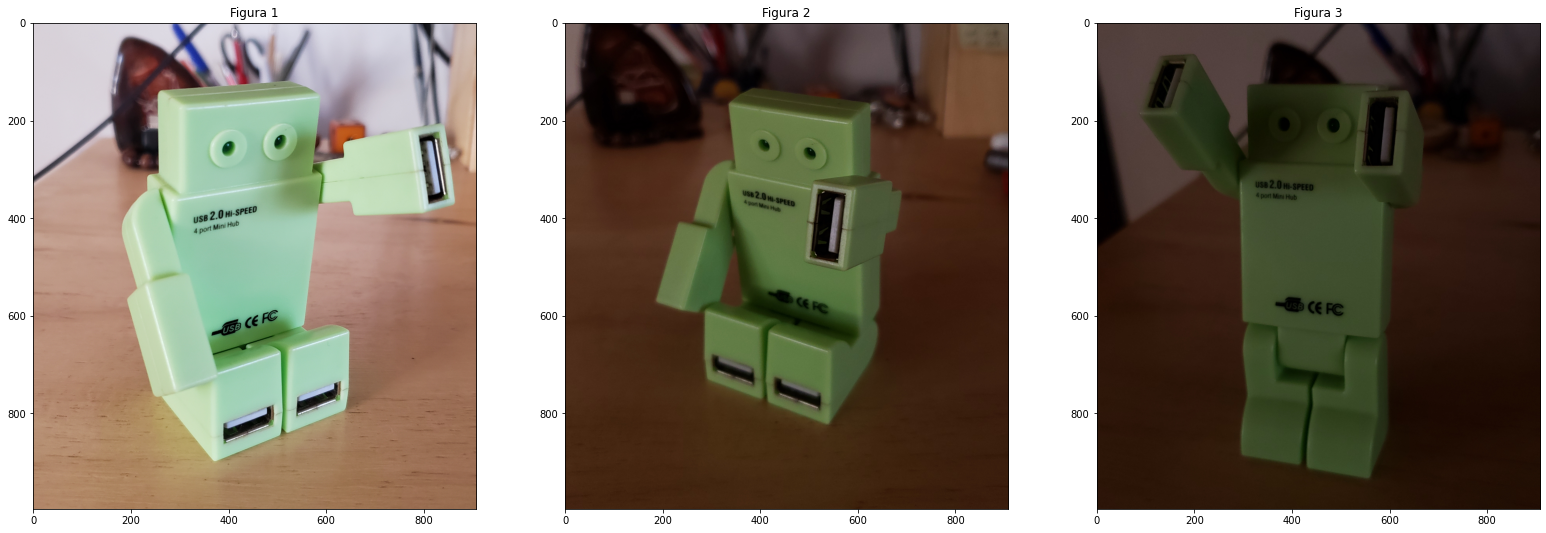

In [ ]:
image_plot(1,3,[CC_1, CC_2, CC_3])

In [ ]:
# Defino la función CoordCrom para obtener las coordenadas cromáticas de cada imágen
def CoordCrom(img):
  den = np.sum(img, axis = -1)
  den = den.reshape((den.shape[0], den.shape[1], 1))
  return img / den

In [ ]:
CC_1_CoordCrom = CoordCrom(CC_1)
CC_2_CoordCrom = CoordCrom(CC_2)
CC_3_CoordCrom = CoordCrom(CC_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


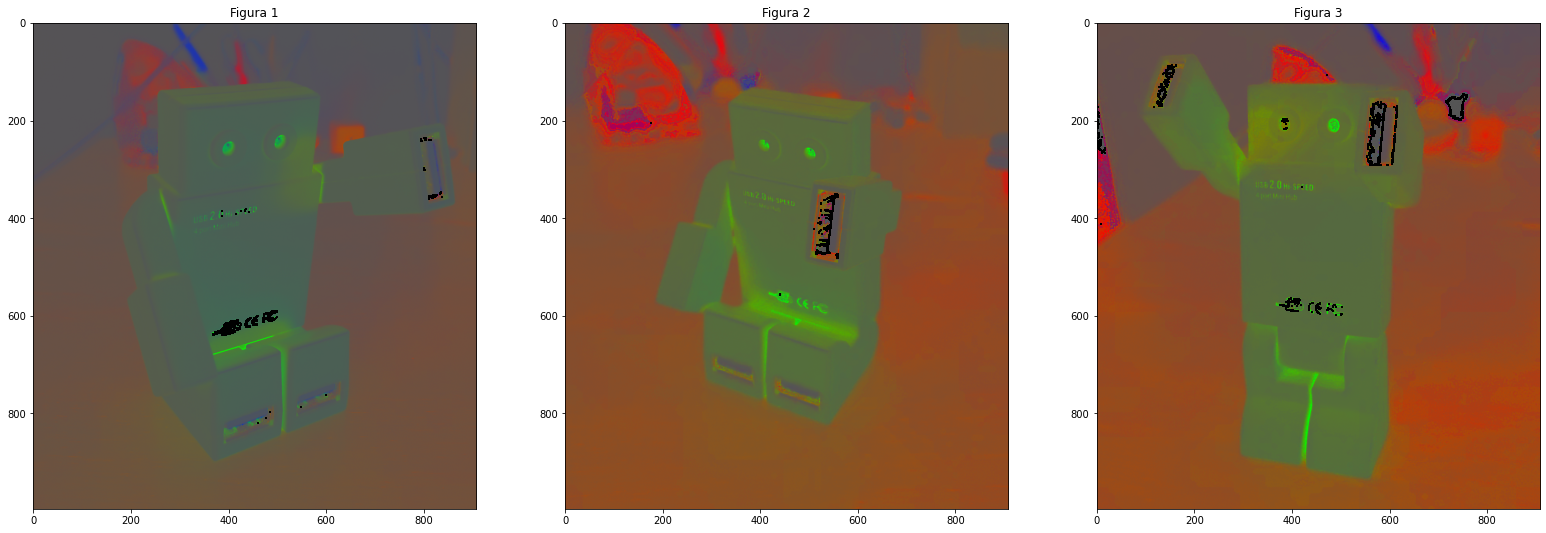

In [ ]:
image_plot(1,3,[CC_1_CoordCrom, CC_2_CoordCrom, CC_3_CoordCrom])

In [ ]:
np.round(CC_1 * 0.5).astype('uint8')

array([[[108, 105, 108],
        [108, 105, 108],
        [108, 105, 108],
        ...,
        [104,  94,  90],
        [103,  93,  88],
        [104,  92,  88]],

       [[108, 104, 108],
        [108, 104, 108],
        [108, 104, 108],
        ...,
        [102,  92,  88],
        [104,  94,  89],
        [102,  92,  88]],

       [[108, 105, 108],
        [108, 106, 108],
        [108, 106, 108],
        ...,
        [102,  93,  88],
        [103,  93,  88],
        [102,  92,  86]],

       ...,

       [[ 88,  66,  52],
        [ 88,  66,  52],
        [ 90,  68,  54],
        ...,
        [ 74,  52,  38],
        [ 76,  54,  40],
        [ 76,  54,  39]],

       [[ 89,  66,  52],
        [ 88,  66,  51],
        [ 88,  66,  52],
        ...,
        [ 76,  54,  40],
        [ 78,  56,  41],
        [ 76,  54,  40]],

       [[ 88,  66,  51],
        [ 88,  66,  50],
        [ 87,  66,  51],
        ...,
        [ 78,  56,  41],
        [ 76,  54,  39],
        [ 76,  52,  38]]

In [ ]:
cv.multiply(CC_3, (5,5,5))

error: ignored

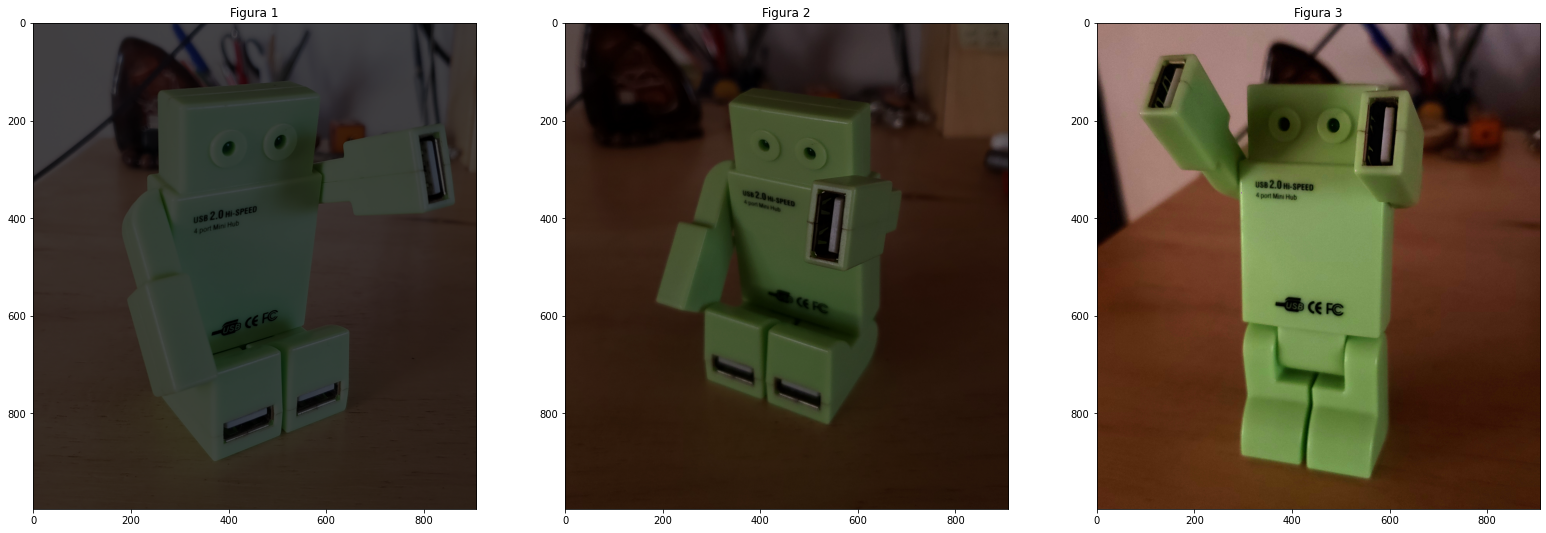

In [ ]:
CC_1_contrastDown = (CC_1 * 0.3).astype('uint8')
CC_2_contrastDown = (CC_2 * 0.7).astype('uint8')
CC_3_contrastUp = (CC_3 * 2).astype('uint8')
image_plot(1,3,[CC_1_contrastDown, CC_2_contrastDown, CC_3_contrastUp])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


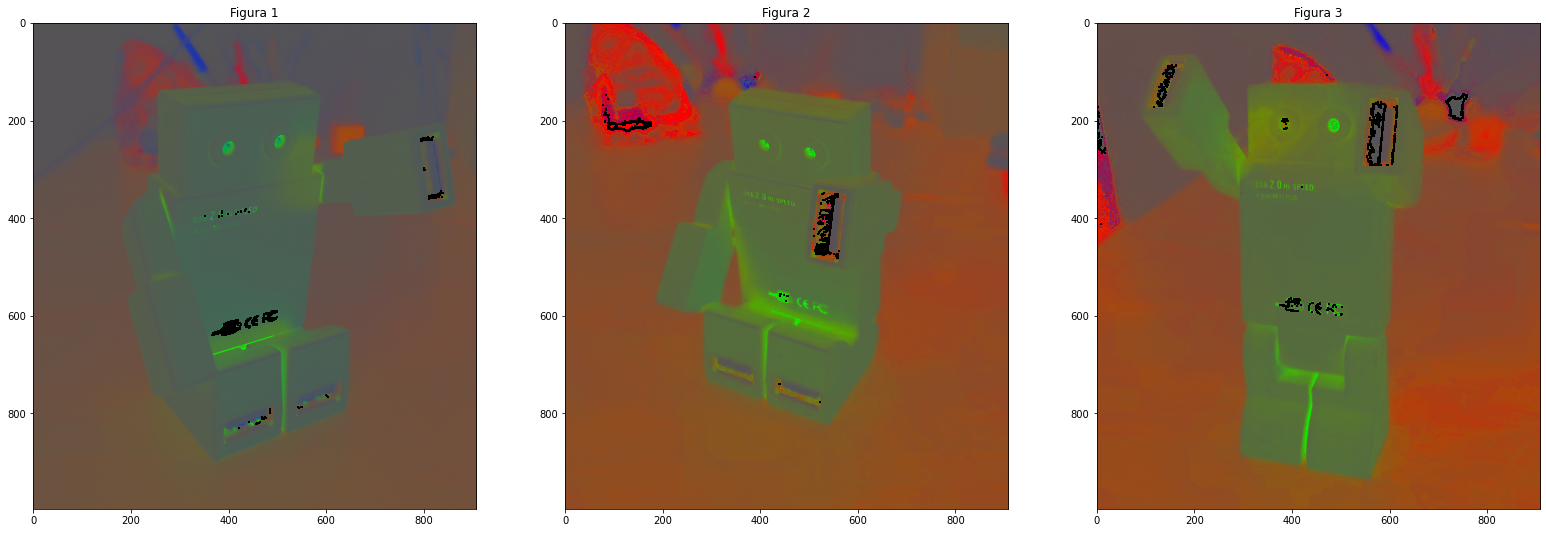

In [ ]:
CC_1_CoordCrom_contrast = CoordCrom(CC_1_contrastDown)
CC_2_CoordCrom_contrast = CoordCrom(CC_2_contrastDown)
CC_3_CoordCrom_contrast = CoordCrom(CC_3_contrastUp)
image_plot(1,3,[CC_1_CoordCrom_contrast, CC_2_CoordCrom_contrast, CC_3_CoordCrom_contrast])

Podemos ver que ante un cambio del contraste en la imagen original la representación en coordenadas cromáticas no cambia.

In [ ]:
contraste=100
img_mod=(1+contraste/100)*CC_3
np.clip(img_mod, 0, 255, out=img_mod)   # Clip trunca a lo que se le diga (0 a 255)
img_mod=img_mod.astype('uint8')
img2 = CoordCrom(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


# WHITE PATCH

In [5]:
TEST_RED = cv.imread('test_red.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
TEST_BLUE = cv.imread('test_blue.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
TEST_GREEN = cv.imread('test_green.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]

In [94]:
# Defino la función WhitePatch para implementar el algorítmo
def WhitePatch(img):
  max = np.max(np.max(img, axis = 0), axis = 0)
  coef = 255 / max
  coef = coef.reshape((1,1,3))
  return (img * coef).astype('uint8')  

In [74]:
TEST_RED_WP = WhitePatch(TEST_RED)
TEST_GREEN_WP = WhitePatch(TEST_GREEN)
TEST_BLUE_WP = WhitePatch(TEST_BLUE)

[247 157 175]
[[[1.03238866 1.62420382 1.45714286]]]
[210 250 171]
[[[1.21428571 1.02       1.49122807]]]
[165 138 200]
[[[1.54545455 1.84782609 1.275     ]]]


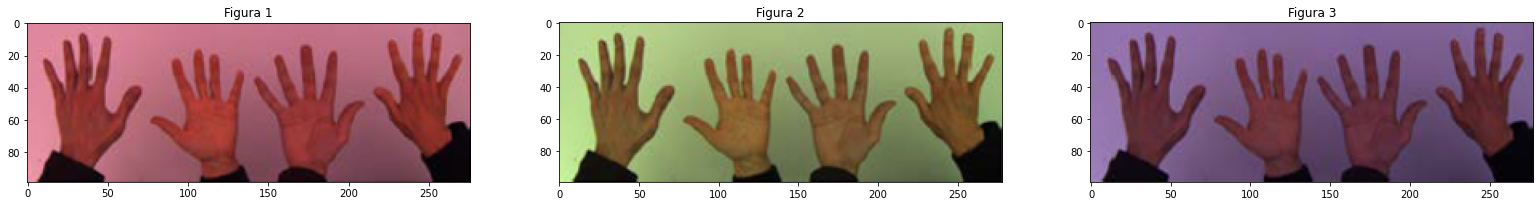

In [10]:
image_plot(1, 3, [TEST_RED, TEST_GREEN, TEST_BLUE])

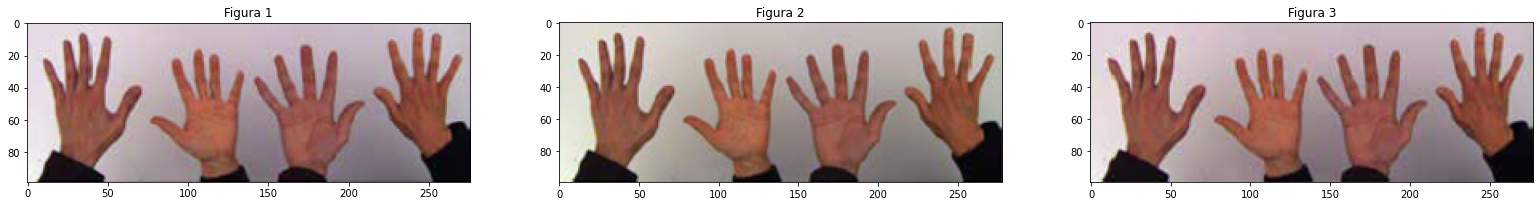

In [75]:
image_plot(1, 3, [TEST_RED_WP, TEST_GREEN_WP, TEST_BLUE_WP])

In [51]:
TITO_R = cv.imread('WP_R.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
TITO_O = cv.imread('WP_O.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
TITO_B = cv.imread('WP_B.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]

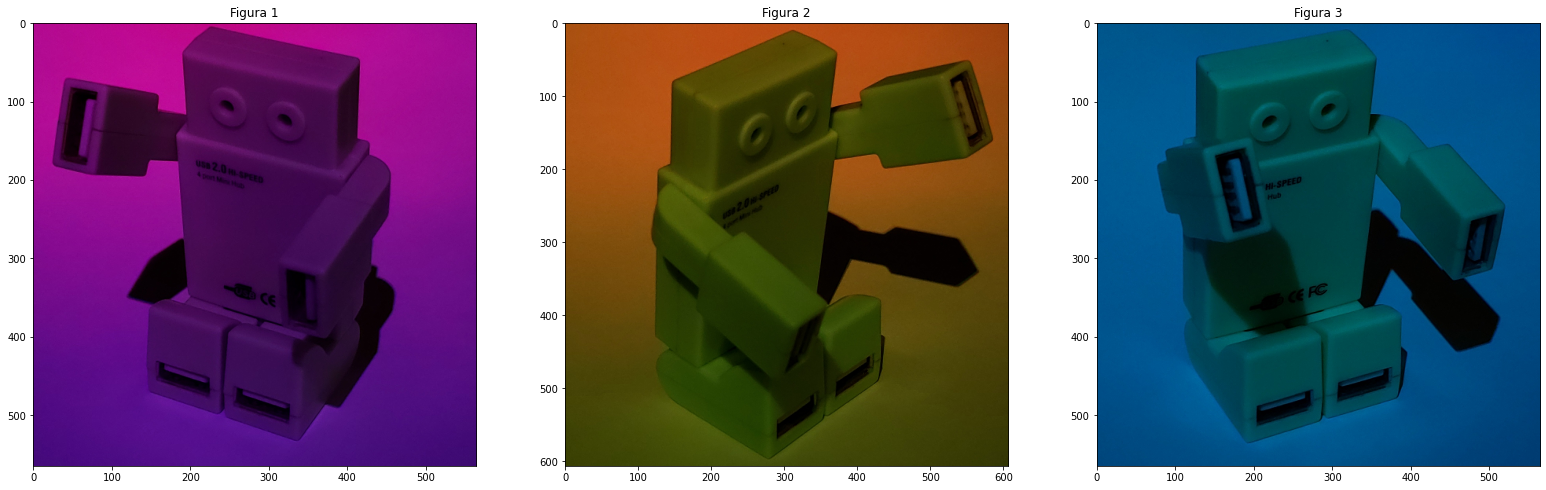

In [52]:
image_plot(1, 3, [TITO_R, TITO_O, TITO_B])

In [54]:
TITO_R_WP = WhitePatch(TITO_R)
TITO_O_WP = WhitePatch(TITO_O)
TITO_B_WP = WhitePatch(TITO_B)

[173  47 208]
[ 49 112 199]
[166 118  31]


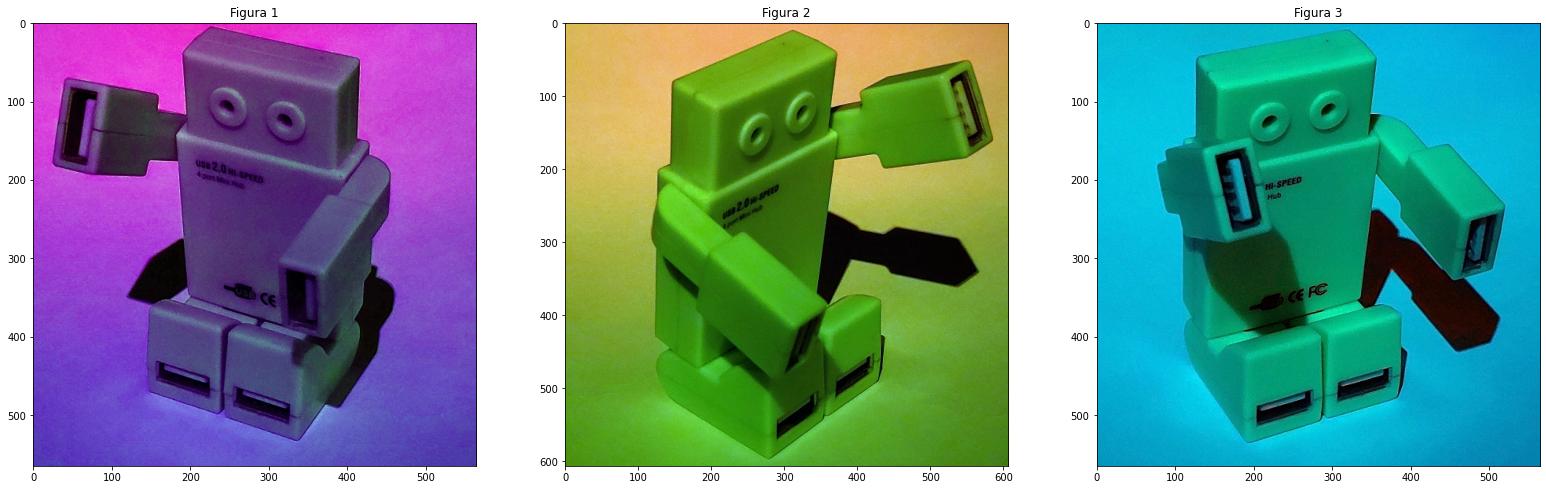

In [15]:
image_plot(1, 3, [TITO_R_WP, TITO_O_WP, TITO_B_WP])

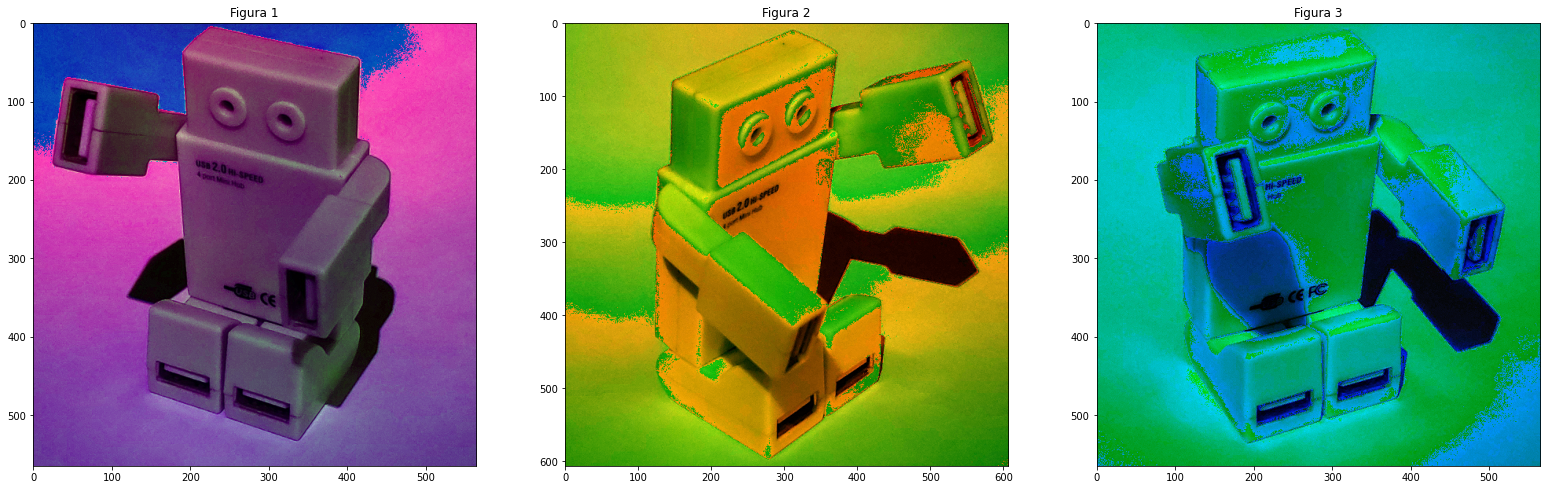

In [55]:
  max = np.max(np.max(TITO_B, axis = 0), axis = 0)
  coef = 255 / max
  coef = coef.reshape((1,1,3))
  return (img * coef).astype('uint8')  

Debido a que los resultados obtenidos no son los mejores, se puede trabajar con algún percentíl en vez del máximo de cada canal.

In [126]:
def plot_histograms(image, title_plot):
  chans=cv.split(image)
  colors=("r", "g", "b")
  plt.figure()
  plt.title("Color histogram, image: " + title_plot)
  plt.xlabel("Bins")
  plt.ylabel("Number of pixels")
  for (chan, c) in zip(chans, colors):
      hist=cv.calcHist([chan], [0], None, [256], [0,256])
      plt.plot(hist, color=c)
      plt.xlim([0,256])
  plt.show()

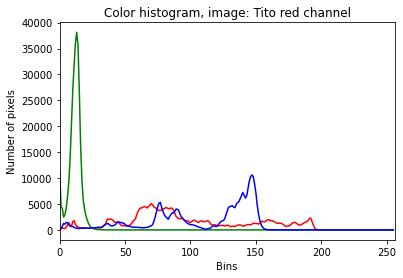

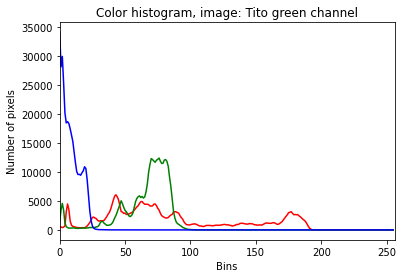

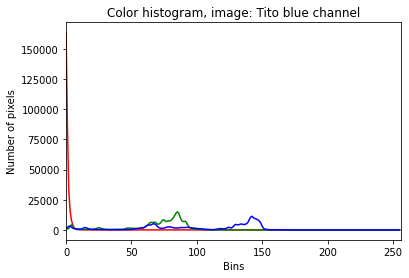

In [127]:
plot_histograms(TITO_R, 'Tito red channel')
plot_histograms(TITO_O, 'Tito green channel')
plot_histograms(TITO_B, 'Tito blue channel')

Redefino la función para trabajar con los percentíles

In [96]:
# Defino la función WhitePatch para implementar el algorítmo
def WhitePatch(img, percentil = 100):
  max = np.percentile(img, percentil, axis = (0, 1))
  coef = 255 / max
  coef = coef.reshape((1,1,3))
  return (img * coef).astype('uint8')  

In [97]:
TEST_RED_WP2 = WhitePatch(TEST_RED)
TEST_GREEN_WP2 = WhitePatch(TEST_GREEN)
TEST_BLUE_WP2 = WhitePatch(TEST_BLUE)

Verifico que los resultados sean iguales a los obtenidos anteriormente

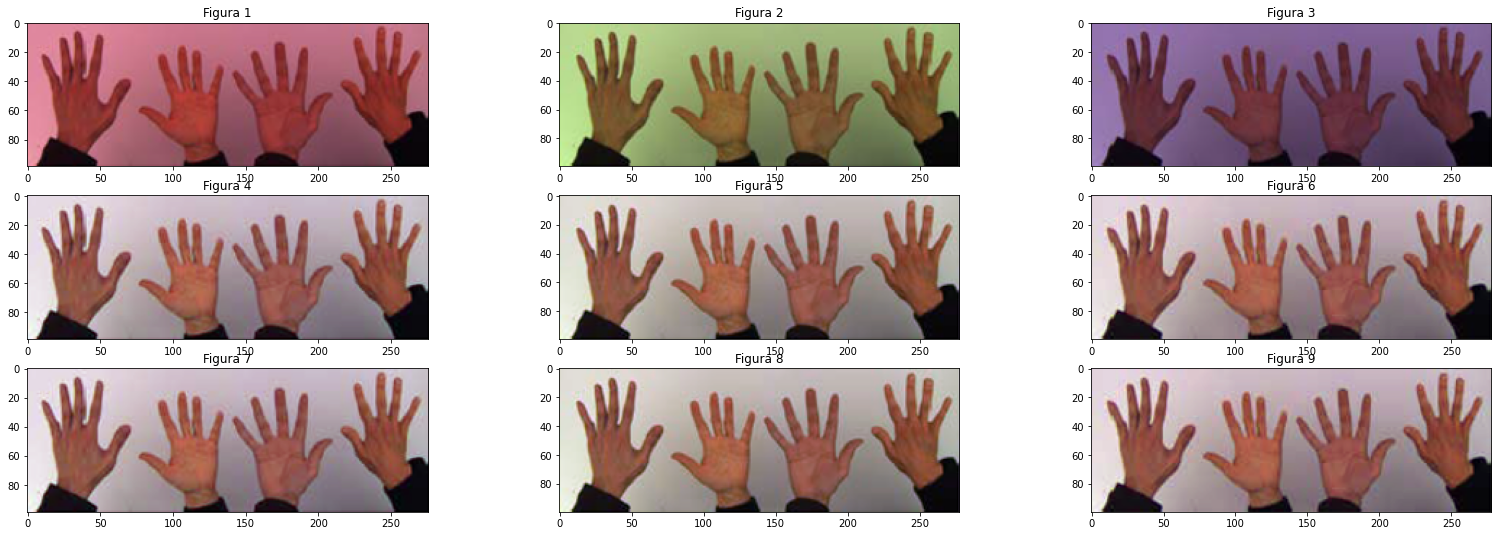

In [98]:
image_plot(3, 3, [TEST_RED, TEST_GREEN, TEST_BLUE, TEST_RED_WP, TEST_GREEN_WP, TEST_BLUE_WP, TEST_RED_WP2, TEST_GREEN_WP2, TEST_BLUE_WP2])

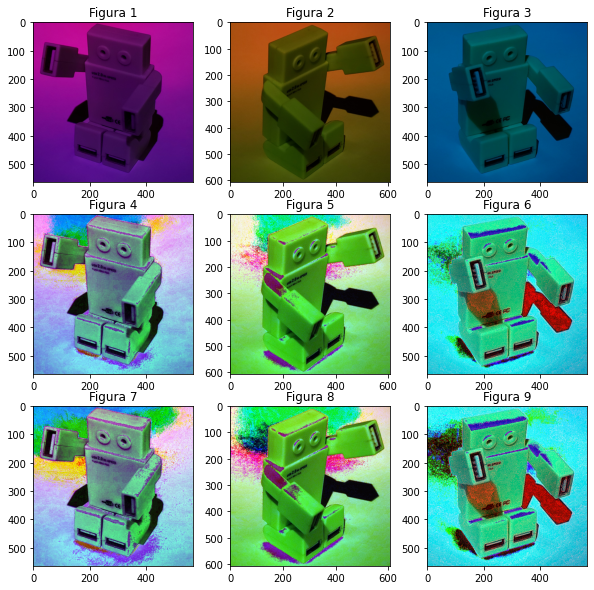

In [105]:
TITO_R_WP95 = WhitePatch(TITO_R, 95)
TITO_O_WP95 = WhitePatch(TITO_O, 95)
TITO_B_WP95 = WhitePatch(TITO_B, 95)
TITO_R_WP98 = WhitePatch(TITO_R, 90)
TITO_O_WP98 = WhitePatch(TITO_O, 90)
TITO_B_WP98 = WhitePatch(TITO_B, 90)

image_plot(3, 3, [TITO_R, TITO_O, TITO_B, TITO_R_WP95, TITO_O_WP95, TITO_B_WP95, TITO_R_WP98, TITO_O_WP98, TITO_B_WP98], fig_size= (10, 10))